# <span style = "color: green"> HR Analytics </span>

***

The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If an employee you have invested so much time and money leaves for "greener pastures", then this would mean that you would have to spend even more time and money to hire somebody else. In the spirit of Kaggle, let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this synthetically generated IBM dataset.

### Let's Dive into it

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'HR-Employee-Attrition.csv' dataset and store it inside a variable

In [2]:
df=pd.read_csv('HR-Employee-Attrition.csv')

### Check head

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Check last 5 rows

In [5]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


### Check shape

In [6]:
df.shape

(1470, 35)

### View info about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### View basic statistical information about the dataset

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Check for null values

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### View unique values in all categorical columns

In [10]:
categorical_features = ['Attrition','BusinessTravel', 'Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in categorical_features:
    print('Unique elements in ', i,'are: ', df[i].unique())

Unique elements in  Attrition are:  ['Yes' 'No']
Unique elements in  BusinessTravel are:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique elements in  Department are:  ['Sales' 'Research & Development' 'Human Resources']
Unique elements in  EducationField are:  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique elements in  Gender are:  ['Female' 'Male']
Unique elements in  JobRole are:  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique elements in  MaritalStatus are:  ['Single' 'Married' 'Divorced']
Unique elements in  Over18 are:  ['Y']
Unique elements in  OverTime are:  ['Yes' 'No']


### Check the number of unique values in all columns

In [11]:
features = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
for i in features:
    print('Number of unique elements in ', i,'are: ', df[i].nunique())

Number of unique elements in  Age are:  43
Number of unique elements in  Attrition are:  2
Number of unique elements in  BusinessTravel are:  3
Number of unique elements in  DailyRate are:  886
Number of unique elements in  Department are:  3
Number of unique elements in  DistanceFromHome are:  29
Number of unique elements in  Education are:  5
Number of unique elements in  EducationField are:  6
Number of unique elements in  EmployeeCount are:  1
Number of unique elements in  EmployeeNumber are:  1470
Number of unique elements in  EnvironmentSatisfaction are:  4
Number of unique elements in  Gender are:  2
Number of unique elements in  HourlyRate are:  71
Number of unique elements in  JobInvolvement are:  4
Number of unique elements in  JobLevel are:  5
Number of unique elements in  JobRole are:  9
Number of unique elements in  JobSatisfaction are:  4
Number of unique elements in  MaritalStatus are:  3
Number of unique elements in  MonthlyIncome are:  1349
Number of unique elements in

### Print out the names of the columns having only one unique values 

In [12]:
features = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
for i in features:
    if df[i].nunique()==1:
        print(i)

EmployeeCount
Over18
StandardHours


### Drop these columns as they won't be useful in our predicition

In [13]:
df=df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Drop EmployeeNumber column aswell

### Create following groupby valuecounts

In [14]:
df.groupby(['Department','EducationField','Gender'])['Gender'].count()

Department              EducationField    Gender
Human Resources         Human Resources   Female      8
                                          Male       19
                        Life Sciences     Female      9
                                          Male        7
                        Medical           Female      2
                                          Male       11
                        Other             Male        3
                        Technical Degree  Female      1
                                          Male        3
Research & Development  Life Sciences     Female    166
                                          Male      274
                        Medical           Female    152
                                          Male      211
                        Other             Female     25
                                          Male       39
                        Technical Degree  Female     36
                                          Male       58

# <span style = "color: orange"> Data Visualization </span>

### Plot the following

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

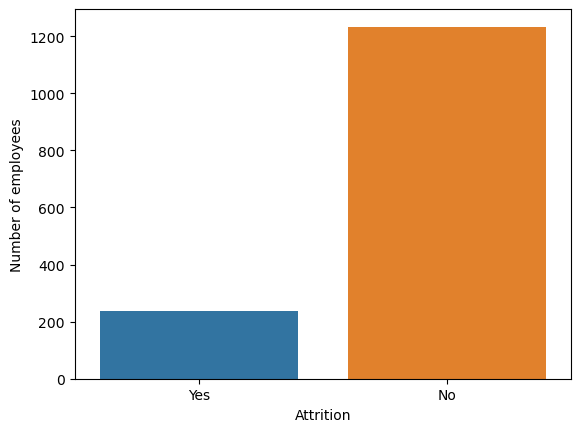

In [16]:
sns.countplot(x='Attrition',data=df)
plt.ylabel('Number of employees')
plt.show()

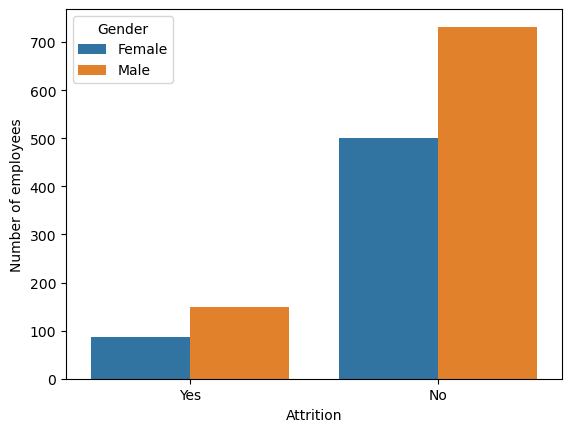

In [17]:
sns.countplot(x='Attrition',hue='Gender',data=df)
plt.ylabel('Number of employees')
plt.show()

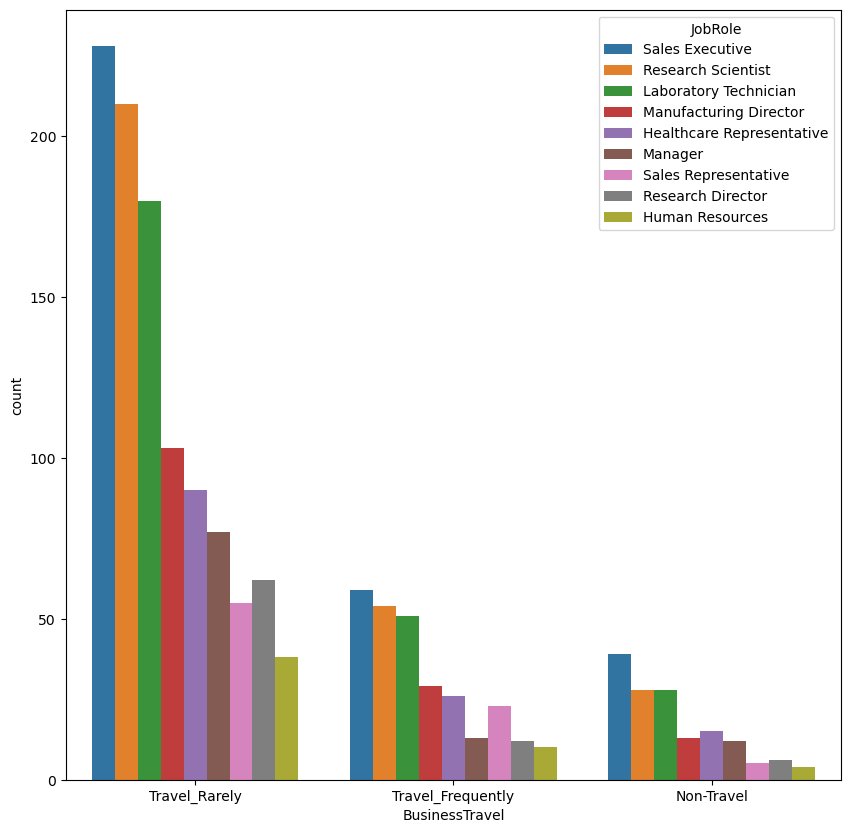

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x='BusinessTravel',hue='JobRole',data=df)
plt.show()

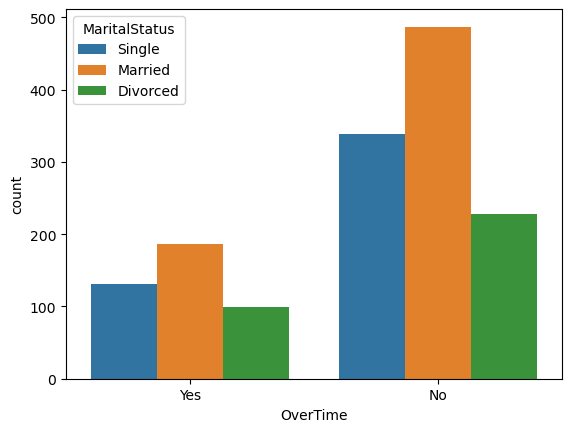

In [19]:
sns.countplot(x='OverTime',hue='MaritalStatus',data=df)
plt.show()

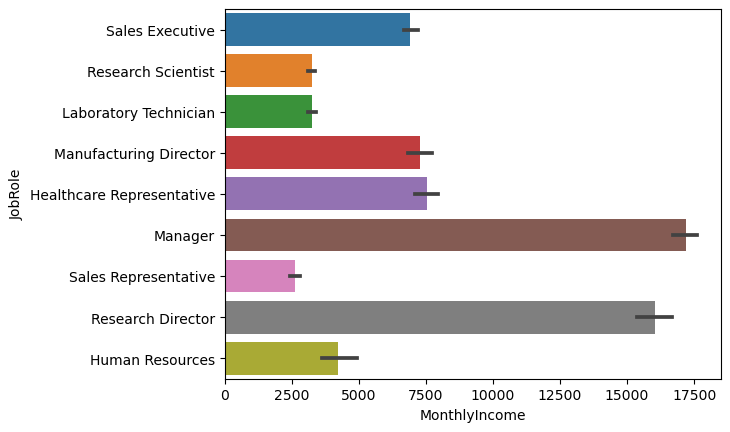

In [20]:
sns.barplot(y='JobRole',x='MonthlyIncome',data=df)
plt.show()

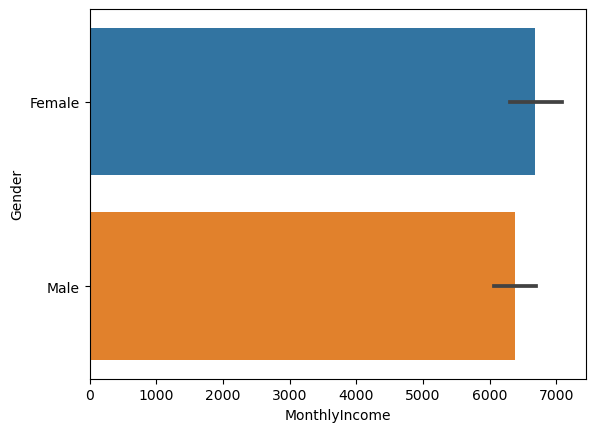

In [21]:
sns.barplot(y='Gender',x='MonthlyIncome',data=df)
plt.show()

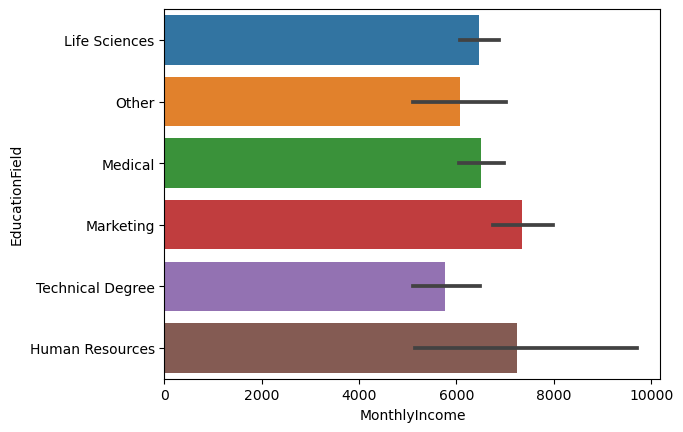

In [22]:
sns.barplot(y='EducationField',x='MonthlyIncome',data=df)
plt.show()

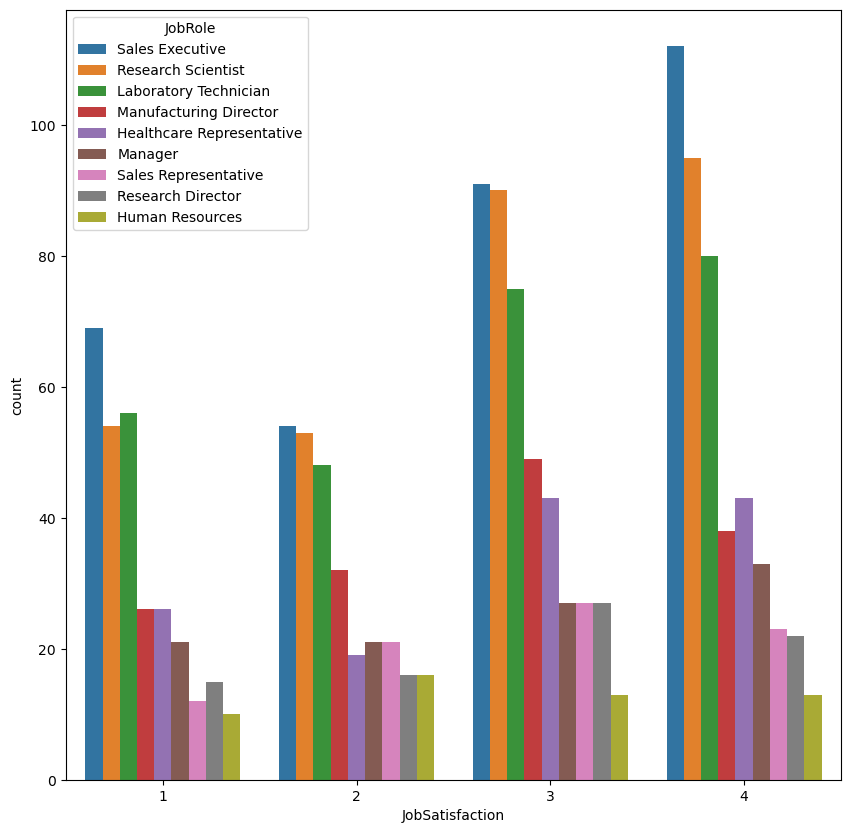

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x='JobSatisfaction',hue='JobRole',data=df)
plt.show()

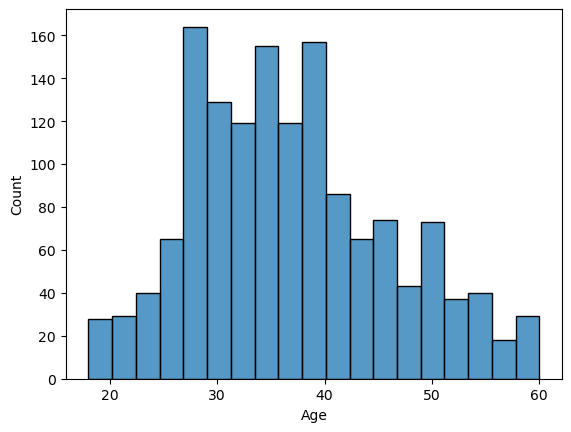

In [24]:
sns.histplot(x='Age',data=df)
plt.show()

### Data Preprocessing

#### Convert Attrition from ('Yes', 'No') to (1,0) 

In [25]:
def yesorno(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0

In [26]:
df['Attrition']=df['Attrition'].apply(yesorno)

In [27]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Convert the rest of the categorical values into numeric using dummy variables and store the results in a new dataframe called 'newdf'

In [28]:
newdf=pd.get_dummies(df,drop_first=True)

In [29]:
newdf.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


#### Check the shape of our new dataset

In [30]:
newdf.shape

(1470, 45)

#### Print unique values in our new dataframe

In [31]:
for i in newdf.columns:
    print('Unique values in ', i,'are: ', newdf[i].unique())

Unique values in  Age are:  [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Unique values in  Attrition are:  [1 0]
Unique values in  DailyRate are:  [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 

#### Split the columns into input and target variables (X and y)

In [32]:
X=newdf.drop(columns='Attrition')
y=newdf['Attrition']

#### Carry out Feature scaling using StandardScaler

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
xcolumns=X.columns

In [36]:
X=scaler.fit_transform(X)

In [37]:
scaled_X=pd.DataFrame(X,columns=xcolumns)

In [38]:
scaled_X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241


### Split the dataset into training and testing set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

## Machine Learning Models

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [42]:
log_reg = LogisticRegression()

In [43]:
param_grid = {
    'C': [0.1, 1.0, 10.0], 
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'] }

In [44]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)

In [45]:
grid_search.fit(X_train, y_train)

C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [46]:
grid_search.best_estimator_

LogisticRegression(solver='saga')

In [47]:
grid_search.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}

In [48]:
Bestmodel=LogisticRegression(C = 1.0,penalty = 'l2', solver = 'saga')

In [49]:
Bestmodel.fit(X_train,y_train)

C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [50]:
y_pred = Bestmodel.predict(X_test)

In [51]:
print('Accuracy score of our model is:',metrics.accuracy_score(y_pred,y_test))
print('Confusion matrix is :', metrics.confusion_matrix(y_pred,y_test))
print('Classification report is:', metrics.classification_report(y_pred,y_test))
cv_score = cross_val_score(Bestmodel, X, y, cv=5)
mean_score=cv_score.mean()
print('Cross Validation Score is:', mean_score)

C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy score of our model is: 0.8684807256235828
Confusion matrix is : [[352  39]
 [ 19  31]]
Classification report is:               precision    recall  f1-score   support

           0       0.95      0.90      0.92       391
           1       0.44      0.62      0.52        50

    accuracy                           0.87       441
   macro avg       0.70      0.76      0.72       441
weighted avg       0.89      0.87      0.88       441

Cross Validation Score is: 0.8829931972789116


C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<span style = "color:orange"> Visualize confusion matrix </span>

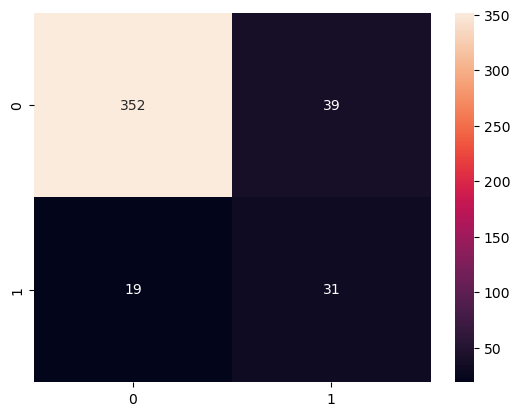

In [52]:
sns.heatmap(metrics.confusion_matrix(y_pred,y_test),annot=True,fmt='d')
plt.show()

### Random Forest Classifier
** Choose the best estimator and parameters :GridSearchCV**

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rlf=RandomForestClassifier()

In [55]:
param_grid = {
    'max_depth': [1, 5, 10,15],
    'n_estimators': [17, 32, 50, 100],
    'n_jobs': [1, 2],
    'random_state': [1, 10, 20, 42,56]
}

In [56]:
grid_search = GridSearchCV(rlf,param_grid, scoring='accuracy')


In [57]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'n_estimators': [17, 32, 50, 100], 'n_jobs': [1, 2],
                         'random_state': [1, 10, 20, 42, 56]},
             scoring='accuracy')

In [58]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=20)

In [59]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 32, 'n_jobs': 1, 'random_state': 20}

In [60]:
grid_search.best_score_

0.8561733364906464

<span style = "color:blue"> Create Random forest model with the best parameters </span>

In [61]:
best_model = RandomForestClassifier(max_depth= 10, n_estimators= 32, n_jobs= 1, random_state= 20)

In [62]:
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=20)

In [63]:
y_pred = best_model.predict(X_test)

In [64]:
print('Accuracy score of our model is:',metrics.accuracy_score(y_pred,y_test))

Accuracy score of our model is: 0.8571428571428571


In [65]:
print('Confusion matrix is :', metrics.confusion_matrix(y_pred,y_test))

Confusion matrix is : [[368  60]
 [  3  10]]


In [66]:
print('Classification report is:', metrics.classification_report(y_pred,y_test))

Classification report is:               precision    recall  f1-score   support

           0       0.99      0.86      0.92       428
           1       0.14      0.77      0.24        13

    accuracy                           0.86       441
   macro avg       0.57      0.81      0.58       441
weighted avg       0.97      0.86      0.90       441



In [67]:
cv_score = cross_val_score(best_model, X, y, cv=5)
mean_score=cv_score.mean()
print('Cross Validation Score is:', mean_score)

Cross Validation Score is: 0.8578231292517007


<span style = "color:orange"> Visualize confusion matrix </span>

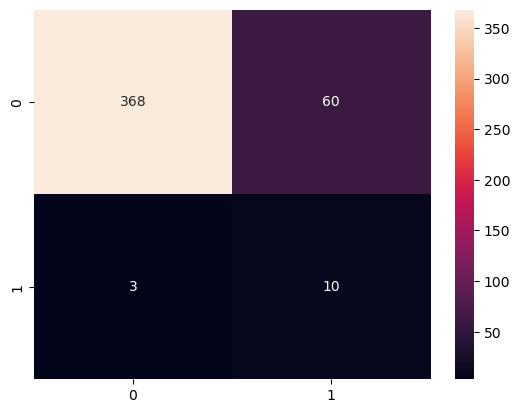

In [68]:
sns.heatmap(metrics.confusion_matrix(y_pred,y_test),annot=True,fmt='d')
plt.show()

### Support Vector Machine

In [69]:
from sklearn.svm import SVC

In [70]:
svc_model=SVC()

In [71]:
param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [72]:
grid_search = GridSearchCV(svc_model,param_grid, scoring='accuracy')


In [73]:
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [74]:
grid_search.best_estimator_

SVC(C=0.95, kernel='sigmoid')

In [75]:
grid_search.best_params_

{'C': 0.95, 'degree': 3, 'kernel': 'sigmoid'}

In [76]:
grid_search.best_score_

0.877565711579446

In [77]:
Best_model=SVC(C=0.95, degree= 3, kernel= 'sigmoid')

In [78]:
Best_model.fit(X_train,y_train)

SVC(C=0.95, kernel='sigmoid')

In [79]:
y_pred=Best_model.predict(X_test)

In [80]:
print('Accuracy score of our model is:',metrics.accuracy_score(y_pred,y_test))

Accuracy score of our model is: 0.8662131519274376


In [81]:
print('Confusion matrix is :', metrics.confusion_matrix(y_pred,y_test))

Confusion matrix is : [[363  51]
 [  8  19]]


In [82]:
print('Classification report is:', metrics.classification_report(y_pred,y_test))

Classification report is:               precision    recall  f1-score   support

           0       0.98      0.88      0.92       414
           1       0.27      0.70      0.39        27

    accuracy                           0.87       441
   macro avg       0.62      0.79      0.66       441
weighted avg       0.94      0.87      0.89       441



In [83]:
cv_score = cross_val_score(best_model, X, y, cv=5)
mean_score=cv_score.mean()
print('Cross Validation Score is:', mean_score)

Cross Validation Score is: 0.8578231292517007


<span style = "color:orange"> Visualize confusion matrix </span>

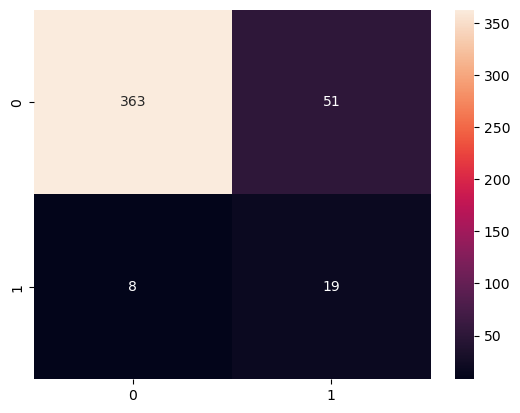

In [84]:
sns.heatmap(metrics.confusion_matrix(y_pred,y_test),annot=True,fmt='d')
plt.show()

### AdaBoost: Classifier

In [85]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier()

In [86]:
param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 1.0]}

In [87]:
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5)

In [88]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]})

In [89]:
grid_search.best_estimator_

AdaBoostClassifier(n_estimators=200)

In [90]:
grid_search.best_params_

{'learning_rate': 1.0, 'n_estimators': 200}

In [91]:
Bmodel=AdaBoostClassifier(learning_rate = 1.0, n_estimators = 50)

In [92]:
Bmodel.fit(X_train,y_train)

AdaBoostClassifier()

In [93]:
y_pred=Bmodel.predict(X_test)

In [94]:
print('Accuracy score of our model is:',metrics.accuracy_score(y_pred,y_test))
print('Confusion matrix is :', metrics.confusion_matrix(y_pred,y_test))
print('Classification report is:', metrics.classification_report(y_pred,y_test))
cv_score = cross_val_score(Bmodel, X, y, cv=5)
mean_score=cv_score.mean()
print('Cross Validation Score is:', mean_score)

Accuracy score of our model is: 0.8684807256235828
Confusion matrix is : [[357  44]
 [ 14  26]]
Classification report is:               precision    recall  f1-score   support

           0       0.96      0.89      0.92       401
           1       0.37      0.65      0.47        40

    accuracy                           0.87       441
   macro avg       0.67      0.77      0.70       441
weighted avg       0.91      0.87      0.88       441

Cross Validation Score is: 0.8768707482993197


<span style = "color:orange"> Visualize confusion matrix </span>

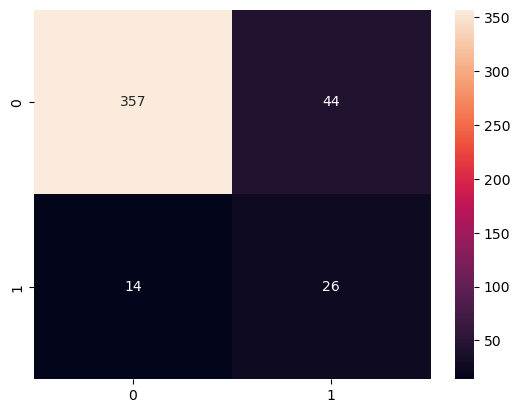

In [95]:
sns.heatmap(metrics.confusion_matrix(y_pred,y_test),annot=True,fmt='d')
plt.show()

### View score of different models in one dataframe

In [109]:
data = {
    "Models": ["Random Forest Classifier", "Logistic Regression", "Support Vector Classifier", "Gradient Boost Classifier"],
    "Score": [0.857823, 0.882993,0.857823, 0.876870]
}
df = pd.DataFrame(data)
df_sorted = df.sort_values(by="Score", ascending=False)
df_sorted

,Models,Score
1,Logistic Regression,0.882993
3,Gradient Boost Classifier,0.876870
0,Random Forest Classifier,0.857823
2,Support Vector Classifier,0.857823


## Use PCA to reduce dimensionality of the data

#### Import PCA and fit our X_train

In [97]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components=0.95)


In [99]:
pca.fit(X_train)

PCA(n_components=0.95)

#### Apply the mapping (transform) to both the training set and the test set.

In [100]:
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

#### Import machine learning model of our choice, we are going with LogisticRegression for this problem

In [101]:
from sklearn.linear_model import LogisticRegression

#### Create LogisticRegression model with the best parameter we got earlier and train it

In [102]:
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [103]:
model.fit(train_X , y_train)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

#### Check the score of our model

In [104]:
y_pred = model.predict(test_X)

In [105]:
model.score(train_X , y_train)

0.8843537414965986

#### Make predictions with X_test and check the accuracy score

In [106]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.8798185941043084


### Print Confusion matrix and Classification report

In [107]:
metrics.confusion_matrix(y_test,y_pred)

array([[367,   4],
       [ 49,  21]], dtype=int64)

In [108]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       371
           1       0.84      0.30      0.44        70

    accuracy                           0.88       441
   macro avg       0.86      0.64      0.69       441
weighted avg       0.88      0.88      0.85       441



# <span style = "color:green"> Good Job! You have Successfully completed one Capstone Project </span>

***